<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/nlp_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Library**

In [1]:
%%capture
!pip install transformers
!pip install datasets

### **Import Libraries**

In [2]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt

### **Load Dataset**

In [3]:
dataset = load_dataset("imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

### **Load Model**

In [9]:
model_name = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

### **Tokenization**

In [10]:
def tokenize_function(example):
  return tokenizer(example["text"], padding="max_length", truncation=True)

tokenized_dataset = dataset['train'].shuffle(seed=1234).select(range(150)).map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["text"])
tokenized_dataset.set_format("torch")
batch_size = 16
dataloader = DataLoader(tokenized_dataset, batch_size=batch_size)

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

In [11]:
def batch_predict(dataloader, model):
    model.eval()
    all_predictions = []

    with torch.no_grad():
        for batch in dataloader:
            outputs = model(batch['input_ids'], batch['attention_mask'])
            logits = outputs.logits
            probabilities = F.softmax(logits, dim=-1)
            all_predictions.append(probabilities)

    return torch.cat(all_predictions)

### **Data Loader**

In [12]:
predictions = batch_predict(dataloader, model)

In [22]:
score = predictions[:,1]

In [24]:
print("The average prediction is", torch.mean(score))
print("the standard deviation is", torch.std(score))

The average prediction is tensor(0.4555)
the standard deviation is tensor(0.4846)


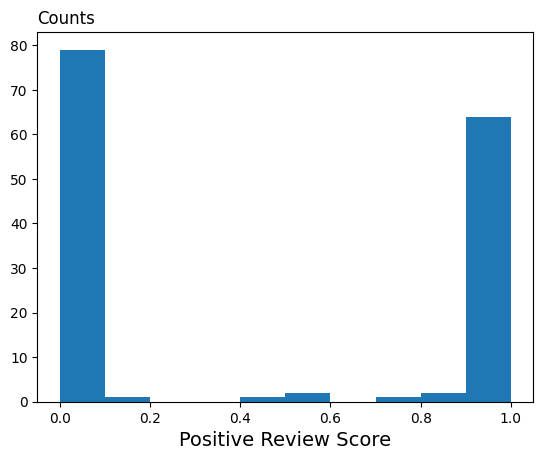

In [25]:
plt.hist(score)
plt.title('Counts', loc='left')
plt.xlabel("Positive Review Score", size=14)
plt.show()